<a href="https://colab.research.google.com/github/Shashanksangu99/LangGraph-AI-Agent/blob/main/Langgraph_AI_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install LangGraph (for multi-agent workflows) and LangSmith
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 13.7 MB/s eta 0:00:00


In [2]:
#Install
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.50
    Uninstalling langchain-core-0.3.50:
      Successfully uninstalled langchain-core-0.3.50
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.7
    Uninstalling langchain-text-splitters-0.3.7:
      Successfully uninstalled langchain-text-splitters-0.3.7
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.22
    Uninstalling langchain-0.3.22:
      Successfully uninstalled langchain-0.3.22


In [3]:
# Retrieve Groq and LangSmith API keys from Colab userdata
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')


In [4]:
# Set environment variables for LangChain API key, tracing, and project name
import os
os.environ["LANGCHAI_API_KEY"]=langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"



In [5]:
# Importing ChatGroq from langchain_groq to enable Groq-powered chat functionality
from langchain_groq import ChatGroq

In [6]:
# Initialize ChatGroq with the "Gemma2-9b-It" model and Groq API key
llm=ChatGroq(model_name="Gemma2-9b-It", groq_api_key=groq_api_key)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7be6c63f1ad0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7be6c642a610>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

##Start Building Chatbot Using Langgraph


In [7]:
# Importing necessary modules for type annotations, graph creation, and message handling in LangGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages



In [8]:
# Defining a State class with a 'messages' key that appends messages to a list using 'add_messages'
class State(TypedDict):
  # Messages have the type 'List'. The 'add_messages' function
  # in the annotation defines how this state key should be updated
  # (in this cas, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

# Creating a StateGraph instance to build the graph with the defined state
graph_builder=StateGraph(State)

In [9]:
graph_builder

In [10]:
# Define a chatbot function that processes the 'messages' state and invokes the model to generate a response
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [11]:
# Adding the 'chatbot' function as a node in the graph builder
graph_builder.add_node("chatbot",chatbot)

In [12]:
# Adding edges to connect the START node to the 'chatbot' node, and the 'chatbot' node to the END node
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [13]:
# Compiling the graph built with nodes and edges into a final graph structure
graph=graph_builder.compile()

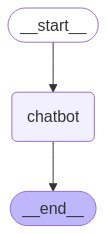

In [14]:
# Attempting to display a visual representation of the graph as a Mermaid diagram (PNG format)
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [15]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]: # If the user types 'quit' or 'q', the loop ends with a goodbye message

    print("Good Bye!!!")
    break
  # Otherwise, the user input is streamed through the graph and processed by the chatbot
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content) # The chatbot's response is then printed

User: give me linkedin data analyst jobs


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:278: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


dict_values([{'messages': AIMessage(content='I do not have access to real-time information, including job postings on LinkedIn or any other platform. \n\nHowever, I can give you tips on how to find Data Analyst jobs on LinkedIn:\n\n**1. Use LinkedIn\'s Search Function:**\n\n* **Keywords:**  Search for terms like "Data Analyst," "Business Analyst," "Data Scientist," "Data Insights," "Market Research Analyst," etc.\n* **Location:** Specify your desired location to narrow down your search.\n* **Filters:** Use filters to refine your search by experience level, industry, company size, and more.\n* **Company:** Search for specific companies you\'re interested in and look for open positions.\n\n**2. Follow Relevant Companies and Influencers:**\n\nFollow companies in industries that interest you and follow influential data professionals in your field. They often share job openings and industry insights.\n\n**3. Join LinkedIn Groups:**\n\nJoin LinkedIn groups related to data analysis, business 

User: q
Good Bye!!!
